In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [104]:
fetus_full = pd.read_csv("Data/fetus-cleaned.csv")
mother_full = pd.read_csv("Data/mother-cleaned.csv")

# Dropping resorp mice for some eda as well as one particular observation with missing data (unknown why)
fetus = fetus_full[fetus_full['Fetus_genotype'] != 3]
fetus = fetus.dropna()

In [105]:
fetus.shape[0]

115

## Assessing distributions of variables

First, we check to see if the sexes of baby mice are split evenly

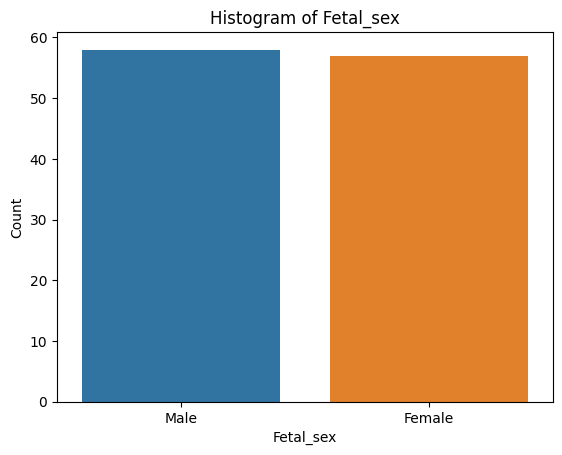

0.4956521739130435


In [106]:
# Checking for a roughly 50/50 split of sex. Important that data is balanced
sns.countplot(data=fetus, x='Fetal_sex')

plt.xlabel('Fetal_sex')
plt.ylabel('Count')
plt.title('Histogram of Fetal_sex')

updated_labels = ['Male', 'Female']
plt.gca().set_xticklabels(updated_labels)

plt.show()

print(np.mean(fetus["Fetal_sex"]))

Looks good. ~50% of babies are female, so no worries about sex breakdown.

Now, we check the distribution of placenta mass, fetal mass, and fetal/placenta ratio

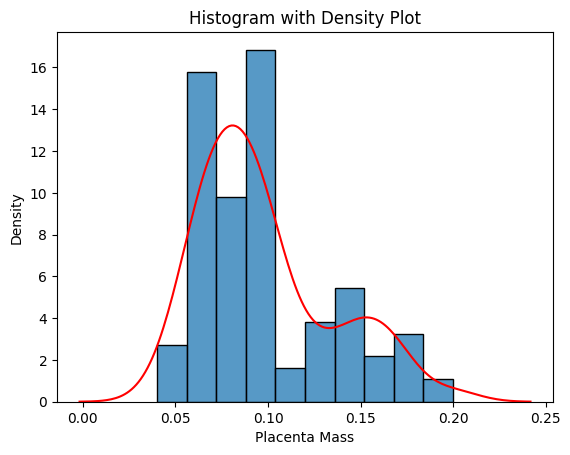

Shapiro-Wilkes p-val: 3.798523380282859e-07


In [109]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Placenta_mass', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Placenta_mass', color='red')

# Set labels and title
plt.xlabel('Placenta Mass')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Placenta_mass'])[1]))

Not normally distributed (right-skew)

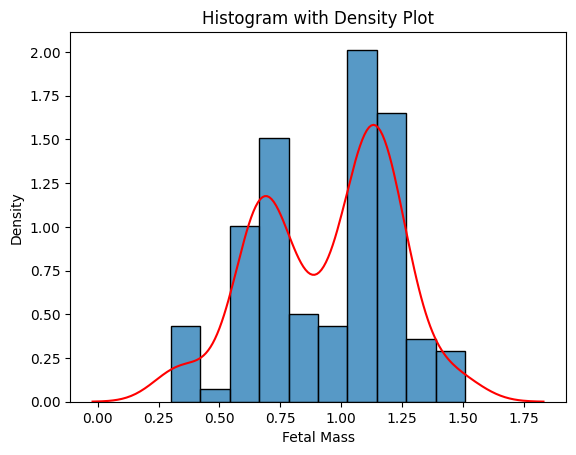

Shapiro-Wilkes p-val: 5.660957322106697e-05


In [110]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Fetal_mass', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Fetal_mass', color='red')

# Set labels and title
plt.xlabel('Fetal Mass')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Fetal_mass'])[1]))

Not normally distributed (bimodal)

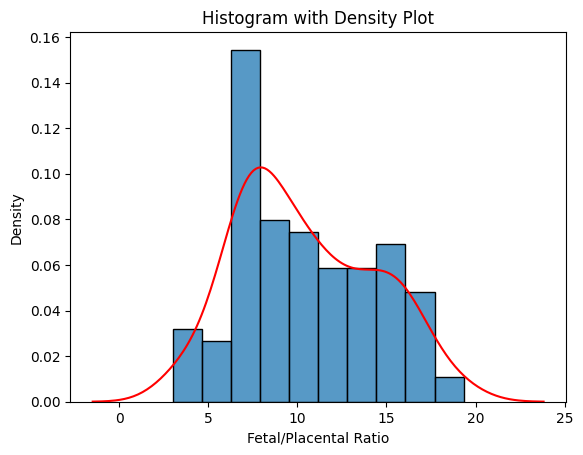

Shapiro-Wilkes p-val: 0.003708906238898635


In [111]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Fetal_placental ratio', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Fetal_placental ratio', color='red')

# Set labels and title
plt.xlabel('Fetal/Placental Ratio')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Fetal_placental ratio'])[1]))

Not normally distributed (right-skew)

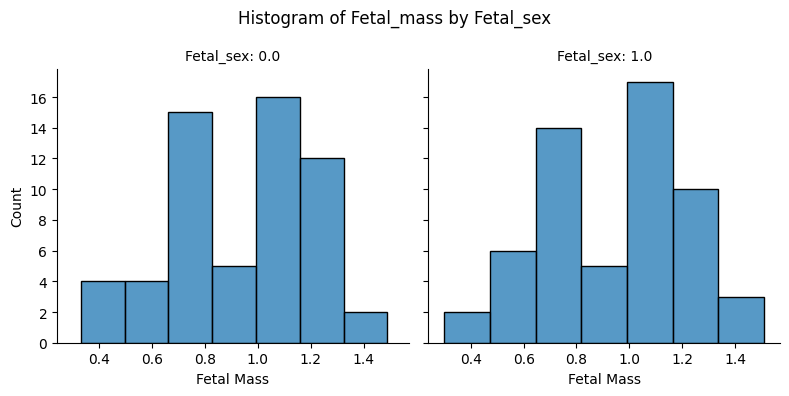

In [113]:
# Create a FacetGrid with histograms wrapped by "Fetal_sex"
g = sns.FacetGrid(data=fetus, col='Fetal_sex', height=4)

# Map histograms to each subplot in the FacetGrid
g.map(sns.histplot, 'Fetal_mass')

# Set labels and title
g.set_axis_labels('Fetal Mass', 'Count')
g.set_titles('Fetal_sex: {col_name}')
plt.suptitle('Histogram of Fetal_mass by Fetal_sex')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [119]:
grouped = fetus.groupby('Fetal_sex')

# Perform Shapiro-Wilk test for normality on 'Fetal_mass' for each group
for group_name, group_data in grouped:
    shapiro_test = stats.shapiro(group_data['Fetal_mass'])
    test_statistic, p_value = shapiro_test
    print(f"Group: {group_name}")
    print("Shapiro-Wilk Test Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Data Size: " + str(group_data.shape[0]))
    print()

Group: 0.0
Shapiro-Wilk Test Statistic: 0.9289374947547913
p-value: 0.002194078639149666
Data Size: 58

Group: 1.0
Shapiro-Wilk Test Statistic: 0.9370275735855103
p-value: 0.005288358777761459
Data Size: 57



Does not help to split by sex. More is going on here than previously thought. I don't think we have enough data to directly explain the bimodal nature of the response variables, so Gaussian Mixture Models might be best.